In [1]:
import openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


# for model-building
from sklearn import model_selection as cv
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score,recall_score,precision_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# for word embedding
import gensim
from gensim.models import Word2Vec
import os


In [2]:
# convert to lowercase, strip and remove punctuations

def preprocess(text):
    text = text.lower() 
    text=text.strip()
    text=re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
# building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
    def fit(self, X, y):
            return self
    
    def transform(self, X):
            return np.array([
                np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                        or [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [3]:
train = pd.read_excel(r'train.xlsx')
test = pd.read_excel(r'test.xlsx')
train['clean_text'] = train['reviews'].apply(lambda x: finalpreprocess(x))
test['clean_text'] = test['reviews'].apply(lambda x: finalpreprocess(x))

In [4]:
train['clean_text'][150]

'invasion privacy instagram update term condition actually look phone message picture see history contact info ridiculous'

In [5]:
train['clean_text'][2]

'hate youtube become youtube used innocent app people would freely wholesome video turn something completely different first animal abuse think u know horrible thing people do animal youtube view mainly view money youtube monetize videos demonizes video word crap may youtube get money horrible content animal abuse sicken youtube use great app really wish youtube would actually look report add animal abuse report report tab youtube favor money actual thing live one video saw youtube force puppy mate old dog already imagine horrible yet another one someone hurt kitten get view pretend save would youtube allow creator care rich actual thing live lose user another thing hate content farm know ill explain content farm basically channel post thing run people people go back money view money multiple youtube account mean view whichs mean money bad part people dont even put lot work video upload past video make seem like add new one basically cycle constantly upload old video account account ta

In [9]:
aaa = train[train['label']==1]
bbb = test[test['label']==1]

In [11]:
datas = pd.concat([aaa,bbb])

In [20]:
for i in datas['clean_text']:
    print(i)

privacy data harvest begin google youtubes owner already hot water much personal data mine people google map track people explicitly turn track come mind youtube something rather similar need know location need know contact need know purchase history need know browse history youtube browse history browse history outside youtube youtube app great ton content good informative video entertain one music get business practice treat customer content creator downright exploitive disgust ive already mention privacy violation let go issue youtube seem think censorship good demonetize video violate ever change rule yet still place ad video receive income video wasnt suitable advertisement due content youtube able monetize dont think due content inappropriate youtube steal content creator think shouldnt say youtube run remind uber think someone say curse word demonetize someone show firearm demonetize someone doesnt agree youtube demonetize hey youtube still profit video anyways honestly believe 

In [21]:
from nltk import ngrams
from collections import Counter
def get_list(test,num):
    total = []
    keys = ["privacy", "private", "security","personal"]
    for text in test['clean_text']:
        tokens  = word_tokenize(text)
        three_grams = ngrams(tokens, num)
        a = [i for i in three_grams for j in i if j in keys]
        total.extend(a)
    return total

In [ ]:
# message

In [25]:
aaa = get_list(datas,3)
a = Counter(aaa)
a.most_common(40)

[(('sell', 'personal', 'information'), 11),
 (('steal', 'personal', 'information'), 9),
 (('new', 'privacy', 'policy'), 9),
 (('change', 'privacy', 'setting'), 8),
 (('steal', 'private', 'information'), 7),
 (('people', 'personal', 'information'), 6),
 (('steal', 'personal', 'info'), 6),
 (('personal', 'information', 'like'), 6),
 (('sell', 'private', 'information'), 6),
 (('collect', 'personal', 'data'), 5),
 (('take', 'personal', 'information'), 5),
 (('sell', 'personal', 'data'), 5),
 (('sale', 'people', 'personal'), 4),
 (('invasion', 'privacy', 'instagram'), 4),
 (('personal', 'data', 'sell'), 4),
 (('use', 'personal', 'data'), 4),
 (('much', 'personal', 'information'), 4),
 (('personal', 'info', 'sell'), 4),
 (('change', 'privacy', 'policy'), 4),
 (('use', 'personal', 'information'), 4),
 (('privacy', 'censorship', 'privacy'), 4),
 (('censorship', 'privacy', 'personal'), 4),
 (('privacy', 'personal', 'information'), 4),
 (('take', 'personal', 'info'), 4),
 (('privacy', 'new', 'pr

In [ ]:
violate,account,collect,information,censorship

In [80]:
from nltk import ngrams
from collections import Counter
def get_list(num):
    total = []
    keys = ["privacy", "private", "security","personal"]
    for i in range(416):
        tokens  = word_tokenize(test['clean_text'][i])
        three_grams = ngrams(tokens, num)
        a = [i for i in three_grams for j in i if j in keys]
        total.extend(a)
    for i in range(1663):
        tokens  = word_tokenize(train['clean_text'][i])
        three_grams = ngrams(tokens, num)
        a = [i for i in three_grams for j in i if j in keys]
        total.extend(a)
    return total

In [95]:
data = get_list(3)

a = Counter(data)
a.most_common(40)

In [96]:
len(data)

3150

In [204]:
train = pd.read_excel(r'label\label_YouTube_20200101_20221215.xlsx')
train['clean_text'] = train['内容'].apply(lambda x: finalpreprocess(x))

In [205]:
for i in train['clean_text']:
    a.extend(i.split(' '))
c = Counter(a)
c.most_common(100)

[('video', 1316),
 ('app', 1305),
 ('youtube', 1253),
 ('watch', 1099),
 ('data', 908),
 ('use', 760),
 ('get', 693),
 ('ad', 674),
 ('like', 597),
 ('make', 509),
 ('dont', 507),
 ('information', 458),
 ('go', 422),
 ('time', 414),
 ('want', 410),
 ('google', 399),
 ('people', 389),
 ('im', 379),
 ('even', 376),
 ('personal', 342),
 ('need', 328),
 ('work', 327),
 ('phone', 293),
 ('thing', 292),
 ('videos', 292),
 ('one', 291),
 ('try', 291),
 ('update', 287),
 ('know', 286),
 ('good', 285),
 ('cant', 282),
 ('see', 277),
 ('fix', 264),
 ('love', 262),
 ('would', 256),
 ('give', 255),
 ('say', 250),
 ('much', 250),
 ('privacy', 247),
 ('also', 242),
 ('keep', 236),
 ('u', 234),
 ('content', 232),
 ('view', 227),
 ('really', 225),
 ('back', 225),
 ('every', 223),
 ('stop', 217),
 ('way', 215),
 ('please', 213),
 ('many', 211),
 ('download', 211),
 ('still', 207),
 ('change', 206),
 ('track', 205),
 ('new', 202),
 ('well', 201),
 ('comment', 198),
 ('p', 198),
 ('take', 197),
 ('pay', 

In [124]:
len(train)

2214

In [222]:
def get_list(num):
    total = []
    keys = ["privacy", "private", "security","personal","steal","invasion","sell"]
    for i in range(len(train)):
        tokens  = word_tokenize(train['clean_text'][i])
        three_grams = ngrams(tokens, num)
        a = [' '.join(i) for i in three_grams for j in i if j in keys]
        total.extend(a)
    return total

In [230]:
data = get_list(3)
a = Counter(data)
a.most_common(100)

[('people personal information', 17),
 ('sale people personal', 15),
 ('personal information put', 13),
 ('money make personal', 10),
 ('make personal information', 10),
 ('personal information something', 10),
 ('steal personal information', 10),
 ('sell personal info', 8),
 ('steal personal data', 6),
 ('sell personal information', 6),
 ('gather sale personal', 6),
 ('sale personal information', 6),
 ('already steal personal', 6),
 ('let sell personal', 6),
 ('others think privacy', 5),
 ('think privacy mmkay', 5),
 ('privacy mmkay mainly', 5),
 ('user privacy without', 5),
 ('childrens online privacy', 5),
 ('online privacy protection', 5),
 ('privacy steal information', 4),
 ('track sell data', 4),
 ('personal data sell', 4),
 ('personal information like', 4),
 ('people sell personal', 4),
 ('该条评论已经被删除censorship privacy personal', 4),
 ('privacy personal information', 4),
 ('sell personal data', 4),
 ('personal information get', 4),
 ('该条评论已经被删除control user privacy', 4),
 ('privacy

In [3]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score,recall_score,precision_score

In [4]:
test = pd.read_excel(r'test.xlsx')
test['clean_text'] = test['reviews'].apply(lambda x: finalpreprocess(x))

In [7]:
keyy = ["privacy", "private", "security","personal", "steal","collect", "invasion", "sell", "track" ,"hack","user","violate","account","collect","information","censorship"]
a = []
b = []
for i in range(8,9):
    tmp = keyy[:i]
    def f2(x):
        keys = tmp
        tokens  = word_tokenize(x)
        for i in keys:
            if i in tokens:
                return 1
        return 0
    print(tmp)
    test['label2'] = test['clean_text'].apply(lambda x: f2(x))
    print(classification_report(test['label'],test['label2'],digits=4),len(keyy[:i]))
    a.append(f1_score(test['label'],test['label2']))
    b.append(len(keyy[:i]))

['privacy', 'private', 'security', 'personal', 'steal', 'collect', 'invasion', 'sell']
              precision    recall  f1-score   support

           0     0.8519    0.8846    0.8679       208
           1     0.8800    0.8462    0.8627       208

    accuracy                         0.8654       416
   macro avg     0.8659    0.8654    0.8653       416
weighted avg     0.8659    0.8654    0.8653       416
 8


In [27]:
keyy = ["privacy", "private", "security","personal", "steal","collect", "invasion", "sell", "track" ,"hack","user","violate","account","collect","information","censorship"]
a = []
b = []
for i in range(2,len(keyy)):
    tmp = keyy[:i]
    def f2(x):
        keys = tmp
        tokens  = word_tokenize(x)
        for i in keys:
            if i in tokens:
                return 1
        return 0
    print(tmp)
    test['label2'] = test['clean_text'].apply(lambda x: f2(x))
    print(f1_score(test['label'],test['label2']),len(keyy[:i]))
    a.append(f1_score(test['label'],test['label2']))
    b.append(len(keyy[:i]))

['privacy', 'private']
0.656441717791411 2
['privacy', 'private', 'security']
0.6565349544072949 3
['privacy', 'private', 'security', 'personal']
0.7621621621621623 4
['privacy', 'private', 'security', 'personal', 'steal']
0.8103896103896104 5
['privacy', 'private', 'security', 'personal', 'steal', 'collect']
0.8214285714285714 6
['privacy', 'private', 'security', 'personal', 'steal', 'collect', 'invasion']
0.8214285714285714 7
['privacy', 'private', 'security', 'personal', 'steal', 'collect', 'invasion', 'sell']
0.8627450980392156 8
['privacy', 'private', 'security', 'personal', 'steal', 'collect', 'invasion', 'sell', 'track']
0.8591885441527447 9
['privacy', 'private', 'security', 'personal', 'steal', 'collect', 'invasion', 'sell', 'track', 'hack']
0.8578199052132702 10
['privacy', 'private', 'security', 'personal', 'steal', 'collect', 'invasion', 'sell', 'track', 'hack', 'user']
0.8506787330316742 11
['privacy', 'private', 'security', 'personal', 'steal', 'collect', 'invasion', 'sel

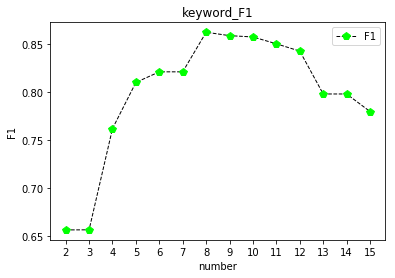

In [46]:
import matplotlib.pyplot as plt

x = b
y = a

plt.plot(x, y,
        color = 'k',  
         linestyle = '--',
         linewidth = 1,
         marker = 'p',
         markersize = 8,
         markeredgecolor = '#00FF00',
         markerfacecolor = '#00FF00',
          label = 'F1'
        
        )

plt.title('keyword_F1')
plt.xlabel('number')
plt.ylabel('F1')
plt.xticks(range(min(x), max(x)+1, 1))
plt.legend()
plt.savefig('zhongzici.png',bbox_inches='tight',pad_inches=0.0,dpi=600)
plt.show()

[0.656441717791411,
 0.6565349544072949,
 0.7621621621621623,
 0.8103896103896104,
 0.8214285714285714,
 0.8214285714285714,
 0.8627450980392156,
 0.8591885441527447,
 0.8578199052132702,
 0.8506787330316742,
 0.8430493273542601,
 0.7983193277310925,
 0.7983193277310925,
 0.7799999999999999]

<Figure size 432x288 with 0 Axes>

In [9]:
print(classification_report(test['label'],test['label2'],digits=4))

              precision    recall  f1-score   support

           0     0.8378    0.8942    0.8651       208
           1     0.8866    0.8269    0.8557       208

    accuracy                         0.8606       416
   macro avg     0.8622    0.8606    0.8604       416
weighted avg     0.8622    0.8606    0.8604       416



In [146]:
test.to_excel('zzz.xlsx')

In [165]:
test['tmp'] = test['label']-test['label2']

In [171]:
a = []
for i in test[test['tmp']==1]['clean_text']:
    a.extend(i.split(' '))
c = Counter(a)
c.most_common(100)